# Classifying Documents using Naive Bayes, Random Forest, Linear and Non-Linear SVM
## by IRFAN ELAHI

# Table of Contents:
1. Introduction 
2. Data Profiling 
3. Tried and discarded approaches 
4. Data Pre-processing 
5. Feature Selection 
6. Learning and Applying different models 
7. Conclusion and recommendations.

## 1. Introduction

In this task, a data-set is used that comprise of different jobs posted on a job portal. The data-set had the following basic properties:
1. It was provided in .csv format.
2. The data-set simulated the real life scenario of jobs posted on a job portal and comprised of Job's title, Job's description along with its category
As the data was labeled so in the context of machine learning, it was a Supervised Machine learning problem i.e. I had access to the data that was already correctly labeled and I had to train a model using this historical data. The main goal was to build a model that could accurately classify new and unseen data when it was input to it i.e. to assign proper class/label/category to a job posting when its input to the model.
As the nature of the data was "text" so this project also involved extensive usage of text mining techniques as well. Text in its basic form is unstructured and to develop predictive models, the data needs to be thoroughly pre-processed. So the pipeline of developing models that I followed was:
Data Profiling -> Data Cleansing -> Exploratory Analysis -> Data Preprocessing -> Feature Extraction and Selection -> Model Development -> Model Evaluation 

When text data is pre-processed, the issue of curse of dimensionality usually appears i.e. data becomes highly multi-dimensional with lots of features ranging in thousands. Not all of those features are helpful and also it adversely affects the peformance of classifiers as well so following the best practices, I opted for best-in-class feature extraction methods and also applied feature selection techniques so as to compile only those features that will contribute in this prediction problem. 
For model development, I used and compared the following set of machine learning algorithms:
1. Bernoulli Naive Bayes
2. Multinomial Naive Bayes
3. Random Forests
4. Linear SVM
5. SVM with non-linear kernel

and compared these algorithms on different metrics like accuracy, F1-Score, training and testing time. As per my analysis, SVM outshines all of the other models when it comes to accuracy. Random Forests accuracy score was also quite good but took considerable time during training phase.
For implementation, I used Python. Specifically, I used the following libraries/modules of Python for different set of tasks:
pandas,
numpy
sklearn
nltk
matplotlib

The following text will walk you through the process and steps that I followed to achieve the desired goal. As I was instructed to include reasoning that why I opted for a particular approach so I will also document my thought process accordingly as well.
To run the code, please make sure that the latest version of Python, Jupyter and aforementioned libraries are installed in your system.










## Data Profiling
The preliminary step in any data science project should be to develop familiarity with the data at hand. Transitioning right away to model development without knowing the basic characteristics of data can cause issues. So in this step, I computed a series of profiles so as to identify issues, perform quality checks and to get an idea of how different features of the data are distributed. 










In [33]:
#Loading all the important modules that will be used in this program at the start. Also assigning aliases to some of the loaded
#so as to minimize typing strokes.
import nltk
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
import sklearn.metrics
from pandas import DataFrame,Series
from sklearn.feature_extraction.text import TfidfVectorizer
from time import time
import matplotlib.pyplot as plt

#Once the cell is executed and assuming that all the aforementioned libraries are present in your systems, the modules would be 
#successfully loaded in the current environment.

In [11]:
#Loading Data-set into python as Dataframe using Pandas, with the most basic parameters:

import os

os.chdir(os.getcwd()) #setting the current working directory to the project folder.


In [14]:

import zipfile as zf #to handle the provided zipfile.
zipped_file=zf.ZipFile(os.getcwd()+'\\job_data_3.zip') #setting the path to the zipped file.

df=pd.read_csv(zipped_file.open('job_data.csv'),sep=',') #opening the desired csv file within the zipped file and loading 
#it as desired data frame.

In [15]:
#as always it helps to take peak into the loaded data-frame to see if it has been loaded correctly as intended:
df.head(10) #to display 10 first rows:

,Unnamed: 0,title,text_description,category
0,1,A Genuine Home Business Opportunity In Persona...,Are you looking for a way to get a huge result...,sales
1,2,Sales Consultant,"Our client is a solar distribution company, cu...",sales
2,3,TRAINEE SALES MARKETING MANAGER,"Are you creative, outgoing and enjoy a challen...",sales
3,4,Trainee Sales/Marketing Manager,Are you a customer service or retail professio...,sales
4,5,Retention Executive,Recognised as the producer of the very best qu...,sales
5,6,Sales Representative IT Digital Signage Melbou...,Our client is one of Victoria's leading audio ...,sales
6,7,Seeking Hungry Individuals Looking for the Nex...,Listing InfoWe are looking for individuals who...,sales
7,8,Education Sales Consultant,This is a new and exciting opportunity to join...,sales
8,9,WORK AT HOME MUMS (WAHM) Self Employment / Hom...,Make Your Ability Really Pay - Australia & Wor...,sales
9,10,SME Business Sales Consultants - Melbourne,We're currently seeking SME Business Sales Con...,sales


In [6]:
df.tail(10) #to display last ten rows:

,Unnamed: 0,title,text_description,category
5827,5829,Senior Android Developer,Pactera Digital is emerging in the Australian ...,dev
5828,5830,Mid-Senior Level PHP Developer,"We are looking for a software developer, havin...",dev
5829,5831,Senior Software Engineer (Mainframe),Our Client is an Australian software product d...,dev
5830,5832,Senior Front End Developer - CQ5,Due to ongoing growth and increased project de...,dev
5831,5833,Senior Front End Developer,My Industry-Leading client needs an experience...,dev
5832,5834,Teradata Developer,Reference: JSJD/AB/phone-phone/JGphone\nLocat...,dev
5833,5835,".Net Software Engineers / Programmers, Sydney ...","Senior C# Analyst Programmer, contract work, S...",dev
5834,5836,Developer,Versadev provide bleeding edge technology solu...,dev
5835,5837,Senior Python Developer,This is a great contract opportunity for someo...,dev
5836,5838,TIBCO Spotfire Developer,An experienced TIBCO Spotfire Developer is req...,dev


so it can be seen that:
1. the data has been loaded somewhat properly in the dataframe
2. The data-set had header rows in it as well which has been loaded in the dataframe as well. Though if required, we can assign different column names to this dataframe as well.
3. the data-set has 5838 rows and 4 columns. It can also be verified using:

In [16]:
print("The data-set has %d rows and %d columns"%(df.shape[0],df.shape[1])) #using the shape attribute of the dataframe object.
#where the first element shows the number of rows and the second element shows the number of columns.


The data-set has 5838 rows and 4 columns


### Hunting Missing Values:

In [17]:
#data-sets usually have missing values in them for a variety of reasons. In Numpy, missing values are represented as NaN and 
#using the following routine, we can quickly check if there is any column in the loaded dataframe that has the missing values.
#in the event of finding missing values, we can drill down further and can adjust out subsequent strategies accordingly:


from __future__ import print_function #my current version of python doesn't have the functionality that I intend to use in the
#following lines of codes so thus importing fresh and new print function "from the future"
print (df.columns) 

#to calculate number of missing values in each column. True values are coerced as 1 and False as 0 and thus I used that
#fact in "sum" function to calculate how many missing values are there in each column:
for col_name in df.columns:
    print (col_name,end=": ")
    print (sum(df[col_name].isnull()))

Index([u'Unnamed: 0', u'title', u'text_description', u'category'], dtype='object')
Unnamed: 0: 0
title: 0
text_description: 1
category: 0


so it can be gathered from the above snippet of code that the text_description column has 1 missing value. The next logical step
should be to find out where is that missing value located.

In [18]:
print(df.ix[df['text_description'].isnull()].index)

Int64Index([3536], dtype='int64')


the above output tells us that at row 3536, the "text_description" column has a missing value. Analyzing that further:

In [19]:
df.ix[3536,] #printing that particular row:

Unnamed: 0                                             3537
title               Student Services Assistant Trainee - AD
text_description                                        NaN
category                                     administrative
Name: 3536, dtype: object

and thus it verifies the fact that there is a missing value in this column represent by NaN. Now there can be three approaches:
1. Either we remove the row which has missing value
2. Or we will "imputate" the missing value
3. Or a more simpler approach: Knowing that the "text_description" column contains text (str) so we can reload the data-set with this knowledge and clearly specifying that in str based missing values. 
Any of the above approach can be done and I experimented with all of these but for this report, I am following the third method for the sake of brevity. thus reloading the data-set with added parameters:

In [20]:
#reading the unzipped file here to demonstrate another usage of read_csv function:
jobs_df=pd.read_csv('job_data.csv',index_col=False,na_values='',na_filter=True,usecols=['title','text_description','category'])

In [21]:
sum(jobs_df.text_description.isnull()) #again checking that whether there are still missing values in that column:

0

In [22]:
jobs_df.head()

,title,text_description,category
0,A Genuine Home Business Opportunity In Persona...,Are you looking for a way to get a huge result...,sales
1,Sales Consultant,"Our client is a solar distribution company, cu...",sales
2,TRAINEE SALES MARKETING MANAGER,"Are you creative, outgoing and enjoy a challen...",sales
3,Trainee Sales/Marketing Manager,Are you a customer service or retail professio...,sales
4,Retention Executive,Recognised as the producer of the very best qu...,sales


now with missing values removed, we can proceed to next stages of data profiling:
### Class Distribution:
Its also imperative to know that whether our data-set is properly balanced w.r.t class distribution or not. For classification, if the data points have somewhat uniform class memberships, then chances of bias is greatly reduced. So to calculate that:

In [23]:
jobs_df.describe(include='all')

,title,text_description,category
count,5837,5837,5837
unique,2477,3844,3
top,Administration Assistant,Are you looking for a way to get a huge result...,administrative
freq,135,241,2730


from this we can gather the following information:
1. There are three unique or distinct values in the category column which translates to the fact that there are three classes.
2. "Administrative" category seems to be the most frequent category in this column 
3. Also the count value confirms that there are no missing values in the dataframe now.

### Handling duplicate values in the dataframe:
Duplicate values can also appear in the dataframe and its also imperative to do this quality check before proceeding to the model development. 
To check the duplicate values in our current dataframe:

In [24]:
sum(jobs_df.duplicated()) #1805 rows are duplicate

1805

the above output shows that there are 1805 duplicate values in the dataframe. To see which rows are duplicated:

In [25]:
jobs_df.ix[jobs_df.duplicated(keep='first'),]

,title,text_description,category
12,A Genuine Home Business Opportunity In Persona...,Are you looking for a way to get a huge result...,sales
26,A Genuine Home Business Opportunity In Persona...,Are you looking for a way to get a huge result...,sales
31,"Make Your Sales Skills Really Pay - $5,000 Per...",Are you looking for a way to get a huge result...,sales
36,Sales Consultant | High End Designer Jewellery...,"When it comes to luxury retailing at its best,...",sales
61,Internal Sales Consultant - High Profile Company,A high profile organisation at the forefront o...,sales
64,"Make Your Sales Skills Really Pay - $5,000 Per...",Are you looking for a way to get a huge result...,sales
70,"Are You Motivated, Passionate and Love Persona...",Are you looking for a way to get a huge result...,sales
75,Education Sales Consultant,This is a new and exciting opportunity to join...,sales
77,"Are You Looking For More? More Time, Money, Fr...",Are you looking for a way to get a huge result...,sales
84,"Are You Motivated, Passionate and Love Persona...",Are you looking for a way to get a huge result...,sales


In [26]:
#creating a new dataframe with the duplicate rows removed from the original dataframe. We can also use drop_duplicate(inplace=True)
#parameter as well.
jobs_df2=jobs_df.drop_duplicates()

In [27]:
#now verifying whether there are still duplicate values in our dataframe or not:
sum(jobs_df2.duplicated()) 
#also the size of our dataframe has also reduced as:
jobs_df2.shape
#previously we had 5837 rows and now with 1805 duplicate rows removed, we have 4032 rows left in our dataframe:

(4032, 3)

In [28]:
#just reassigning somewhat smaller column names for convenience. We can always change them later
jobs_df2.columns=['title','desc','category']

### Finding out the Value Distribution profile of the Category Variable:
Its crucial to know in advance the basic statistics of the target/label variable so as to ensure that there is no issue of class imbalance there. For that, we need to calculate the count of each of the class label instances in our dataframe.

In [29]:
category_counter={x:0 for x in set(jobs_df2['category'])}


In [30]:
for each_cat in jobs_df2['category']:
    category_counter[each_cat]+=1

In [31]:
print(category_counter)

{'administrative': 1861, 'sales': 1186, 'dev': 985}


<Container object of 3 artists>

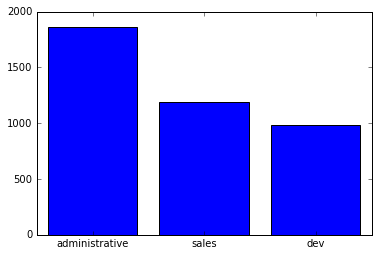

In [34]:
%matplotlib inline
plt.bar(range(len(category_counter)),category_counter.values(),align='center',tick_label=category_counter.keys())

In [ ]:
#Its clear from the above plot that how the count of the three classes in the category column are distributed. As there is not
#much of a difference in the relative count of each of these classes so we can safely proceed to the model development.
#if there was a lot of imbalance, we may had to resort to under or oversampling during the training and testing phase so as 
#to minimize the bias.

## Lexical Analysis of the Text Data:
As text data's preprocessing transforms the words/terms into respective columns (though in much improved approach e.g. only frequent terms and also the rare ones (TFIDF) are transformed into columns, more on that later), so its a good step to analyze the vocabulary richness of our data. 
If we just analyze the lexical richness of the text_description data, it will still give us much idea about how rich our data is in terms of unique vocabulary words:

In [36]:
corpus=jobs_df2.desc

In [37]:

all_words=[w.split() for w in corpus]

all_flat_words=[ewords for words in all_words for ewords in words]

from nltk.corpus import stopwords

all_flat_words_ns=[w for w in all_flat_words if w not in stopwords.words("english")]
#removing all the stop words from the corpus

set_nf=set(all_flat_words_ns)
#removing all duplicates
#I didn't convert my text into unicode and that's why this subtle warning message appears. by using unicode() function, this
#warning can easily be addressed.

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


In [38]:
print("Number of unique vocabulary words in the text_description column of the dataframe: %d"%len(set_nf))
#a very naive and base approach would be to use all of these 33k features in the classification. But its not recommended because
#many classification algorithms cant work in such immensely high dimension data. 
#Relatively better approach would be to use N top frequent words by following bag of words approach. But this tends to favor 
#those terms which are repeated in all of the corpus; which dont help in the overall classification objective.
#On comparison, a much better approach is to use TFIDF. 
#As we will see that number of unique vocabulary terms will be helpful in making comparison when we derive much less
#yet important features using tfidf.

Number of unique vocabulary words in the text_description column of the dataframe: 33790


## Data Pre-Processing:
The data in its raw form isn't always suitable for developing analytical models. To make the raw data compliant for analysis, pre-processing steps have to be performed. The pre-processing steps depend largely on the type of analysis that one intends to perform for instance regression, classification or clustering. In our particular case, we want to perform multi-class classification and the data at hand is text. So to perform pre-processing, the following steps are performed:
1. Converting all of the data into lower case.
2. Stemming the words so as to further reduce the feature size

Also, in our given data set, I've made use of both the given features i.e. title and job description to create new features and for pre-processing. I've found that if we use both titles and job description, better features are formed and overall accuracy score of classifier is improved. title also contains the terms that can assist us in classification and that's why I've included them:

The following snippet of code performs these steps:

In [39]:
porter=nltk.PorterStemmer()
for each_row in jobs_df2.itertuples():
    m1=map(lambda x: unicode(x,'utf-8'),(each_row[1]+' '+each_row[2]).lower().split())
    #for each row, it gets title and job description, concatenates them and converts them to lower case. Also converts them
    #to unicode because NLTK's porter stemmer expects unicode data.
    m2=map(lambda x: porter.stem(x),m1)
    #Using Porter Stemmer in NLTK, stemming is performed on the str created in previous step.
    jobs_df2.loc[each_row[0],'title_desc']=' '.join(m2)
    #a derived column is created and the pre-processed string is stored in that column for each row.
#here's a sneak-peek of the dataset with newly created column that contains our processed text. Its still in one column and 
#in subsequent steps, I will create a document term matrix using TFIDF mechanism to create features for classifiers:


C:\Anaconda2\lib\site-packages\pandas\core\indexing.py:266: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Anaconda2\lib\site-packages\pandas\core\indexing.py:426: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Anaconda2\lib\site-packages\pandas\core\indexing.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [122]:
#to confirm if we have successfully completed the transformation:
jobs_df2.head()
#it can be seen that a new column is created and filled with the stemmed words comprised of data concatenated from title and desc
#columns of the data frame. This newly created column will become our corpus for subsequent feature extraction process.

,title,desc,category,title_desc
5831,Senior Front End Developer,My Industry-Leading client needs an experience...,dev,senior front end develop my industry-lead clie...
5833,".Net Software Engineers / Programmers, Sydney ...","Senior C# Analyst Programmer, contract work, S...",dev,".net softwar engin / programmers, sydney cbd c..."
5834,Developer,Versadev provide bleeding edge technology solu...,dev,develop versadev provid bleed edg technolog so...
5835,Senior Python Developer,This is a great contract opportunity for someo...,dev,senior python develop thi is a great contract ...
5836,TIBCO Spotfire Developer,An experienced TIBCO Spotfire Developer is req...,dev,tibco spotfir develop an experienc tibco spotf...


In [149]:
corpus=jobs_df2.title_desc
#corpus means collection of text. For this particular data-set, I will treat the newly created column title_desc
#as my corpus and will use that to create features.
vectorizer = TfidfVectorizer(stop_words='english')
#Initializing TFIDF vectorizer to conver the raw corpus to a matrix of TFIDF features and also enabling the removal of stopwords.
tfidf_matrix=vectorizer.fit_transform(corpus).todense()
#creating TFIDF features sparse matrix by fitting it on the specified corpus. 
tfidf_names=vectorizer.get_feature_names()
#grabbing the name of the features.

In [234]:
print("Number of TFIDF Features: %d"%len(tfidf_names)) #same info can be gathered by using tfidf_matrix.shape

Number of TFIDF Features: 13043


In [ ]:
#which shows that there are 13043 columns that will be used for training the classifier. These are much smaller than the total
#number of unique vocabulary words that are there (as we calculated previously) in the text description column alone.

In [ ]:
training_time_container={'b_naive_bayes':0,'mn_naive_bayes':0,'random_forest':0,'linear_svm':0}
prediction_time_container={'b_naive_bayes':0,'mn_naive_bayes':0,'random_forest':0,'linear_svm':0}

accuracy_container={'b_naive_bayes':0,'mn_naive_bayes':0,'random_forest':0,'linear_svm':0}

## Learning Classifiers, Making Predictions and Validating Results:
With the data preprocessed, now is the time to develop the models. When it comes to developing machine learning models (and in our particular case, classifiers), we need to firstly train them on the labeled training data to learn from and then use the test data-set to make predictions. 
So to do that, we will proceed with splitting our existing data-set into training and test data as follows:

In [150]:
# As no separate test data-set was given so the provided data set is split into training and test data set using 70-30% ratio 
#as follows:
variables = tfidf_matrix
#considering the TFIDF features as independent variables to be input to the classifier.
labels = jobs_df2.category
#considering the category values as the class labels for the classifier.

variables_train, variables_test, labels_train, labels_test  =   train_test_split(variables, labels, test_size=.3)
#splitting the data into random training and test sets for both independent variables and labels.

In [151]:
#analyzing the shape of the training and test data-set:
print('Shape of Training Data: '+str(variables_train.shape))
print('Shape of Test Data: '+str(variables_test.shape))

Shape of Training Data: (2822L, 13043L)
Shape of Test Data: (1210L, 13043L)


### Applying Naive Bayes:
Naive Bayes is one of the most widely used classification algorithm in text mining applications. Based on Bayes theorem, this model makes the assumption that all the features are independent of each other and uses the probabilities of each attribute belonging to each class to make a prediction. 
The condition of independence may not be valid in many circumstances but  as a base line model, its a good starting point to test its  performance on the provided data.
There are two forms of Naive Bayes:
1. Bernoulli (designed for boolean/binary features i.e.  just considers the presence or absense of a feature)
2. Multinomial (which also considers the occurrence counts of the feature)

We will apply both and then will assess their respective accuracy scores:


In [242]:
training_time_container.keys()

['b_naive_bayes', 'linear_svm', 'mn_naive_bayes', 'random_forest']

In [264]:
from sklearn.naive_bayes import BernoulliNB
#loading Gaussian Naive Bayes from the sklearn library:
bnb_classifier=BernoulliNB()
#initializing the object
t0=time()
bnb_classifier=bnb_classifier.fit(variables_train,labels_train)
training_time_container['b_naive_bayes']=time()-t0
#fitting the classifier or training the classifier on the training data

In [272]:
#after the model has been trained, we proceed to test its performance on the test data:
t0=time()
bnb_predictions=bnb_classifier.predict(variables_test)
prediction_time_container['b_naive_bayes']=time()-t0


In [273]:
prediction_time_container['b_naive_bayes']

0.5590000152587891

In [266]:
#the trained classifier has been used to make predictions on the test data-set. To evaluate the performance of the model,
#there are a number of metrics that can be used as follows:
nb_ascore=sklearn.metrics.accuracy_score(labels_test, bnb_predictions)
accuracy_container['b_naive_bayes']=nb_ascore


In [249]:
print("Bernoulli Naive Bayes Accuracy Score: %f"%accuracy_container['b_naive_bayes'])
print("Training Time: %f"%training_time_container['b_naive_bayes'])
print("Prediction Time: %f"%prediction_time_container['b_naive_bayes'])

Bernoulli Naive Bayes Accuracy Score: 0.952066
Training Time: 1.375000
Prediction Time: 0.502000


In [239]:
#it shows that the accuracy score of our model is 0.954 or 95.4%. 
#Confusion Matrix is also another way to evaluate the prediction output of a classifier and also to determine the false positive
#and false negative, sensitivity, specificity, precision and recall metrics:
print("Confusion Matrix of Bernoulli Naive Bayes Classifier output: ")
sklearn.metrics.confusion_matrix(labels_test,bnb_predictions)
#the values on the diagonal show correct predictions where as off-diagonal represent the records that have been misclassified.
#also printing the detailed report as follows:


Confusion Matrix of Bernoulli Naive Bayes Classifier output: 


array([[559,   1,   3],
       [  3, 296,   0],
       [ 50,   1, 297]])

In [160]:
print("Classification Metrics: ")
print(sklearn.metrics.classification_report(labels_test,nb_predictions))
#accuracy score can be misleading when there is class imbalance problem in the data-set. In our case, the problem wasn't that
#significant. F1-Score is a better measure of a classifier performance. The greater the F1-Score, the better. Also, we can see
#that F1-Score and Accuracy score are somewhat similar because the data-set has negligible class imbalance issue:

Classification Metrics: 
             precision    recall  f1-score   support

administrative       0.89      0.88      0.89       563
        dev       0.97      0.97      0.97       299
      sales       0.83      0.84      0.84       348

avg / total       0.89      0.89      0.89      1210



### Applying Multinomial Naive Bayes:
Bernoulli Naive Bayes just uses the fact that whether a feature is present or not. However if we somehow also take into account
the occurrence weight or count of the feature as well (in our case, the TFIDF weight of each feature), we can hypothesize that the performance of such classifier will be equally good, if not better. For this purpose, I've made use of the Multi-nomial Naive Bayes as follows:

In [240]:
from sklearn.naive_bayes import MultinomialNB
mn_bayes=MultinomialNB()
t0=time()
mn_bayes_fit=mn_bayes.fit(variables_train,labels_train)
training_time_container['mn_naive_bayes']=time()-t0
t0=time()
prediction_mn=mn_bayes_fit.predict(variables_test)
prediction_time_container['mn_naive_bayes']=time()-t0
mn_ascore=sklearn.metrics.accuracy_score(labels_test, prediction_mn) 
accuracy_container['mn_naive_bayes']=mn_ascore

In [241]:
#if we see the accuracy score of Multinomial Naive Bayes classifier, we come to see that it turns out be around 0.934 or 93.4%
print("Accuracy Score of Multi-Nomial Naive Bayes: %f" %(mn_ascore))
#and its training and prediction time are:
print("Training Time: %fs"%training_time_container['mn_naive_bayes'])
print("Prediction Time: %fs"%prediction_time_container['mn_naive_bayes'])

Accuracy Score of Multi-Nomial Naive Bayes: 0.933884
Training Time: 0.334000s
Prediction Time: 0.094000s


### Applying Random Forest Classifier:
Random Forests belong to the ensemble learning methods for classification and regression tasks. In Random Forest, a subset of the training data is fit on a number of decision trees. Random Forests have the characteristic to minimize  variance if its there in the data-set. 
There training time is generally quite higher which is one of their drawbacks to be used in production environment. However, the operations can be parallelized to reduce the training time.
Also, greater the number of trees in the random forests, better will be the result however it comes with a trade off: the training time tends to increase as well. Also, if the number of trees tend to increase, the rate of improvement of accuracy may also tend to slow as well.
I've used random forests with 50 trees. However, we can implement a routine to check the accuracy of the random forests by using different number of trees as well:

In [176]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier=RandomForestClassifier(n_estimators=50)
t0=time()
rf_classifier=rf_classifier.fit(variables_train,labels_train)

training_time_container['random_forest']=time()-t0
print("Training Time: %fs"%training_time_container['random_forest'])

t0=time()
rf_predictions=rf_classifier.predict(variables_test)
prediction_time_container['random_forest']=time()-t0
print("Prediction Time: %fs"%prediction_time_container['random_forest'])

accuracy_container['random_forest']=sklearn.metrics.accuracy_score(labels_test, rf_predictions)
print ("Accuracy Score of Random Forests Classifier: ")
print(accuracy_container['random_forest'])
print(sklearn.metrics.confusion_matrix(labels_test,rf_predictions))


Training Time: 6.059000s
Training Time: 0.150000s
Accuracy Score of Random Forests Classifier: 
0.984297520661
[[562   0   1]
 [  4 293   2]
 [ 12   0 336]]


### Applying Linear Classifier (SVM) using Stochastic Gradient Descent:
Stochastic Gradient Descent (SGD) is a one of the most efficient approaches used in linear classifiers under convex loss functions such as (linear) Support Vector Machines.
It has proven to perform well in in large-scale and sparse machine learning problems. Such problems are also encountered in text classification and natural language processing tasks and that motivates the fact to use this in our problem.


In [251]:
#I've used hinge loss which gives linear Support Vector Machine. Also set the learning rate to 0.0001 (also the default value)
#which is a constant that's gets multiplied with the regularization term. For penalty, I've used L2 which is the standard
#regularizer for linear SVMs:

from sklearn import linear_model

svm_classifier=linear_model.SGDClassifier(loss='hinge',alpha=0.0001)

t0=time()
svm_classifier=svm_classifier.fit(variables_train, labels_train)
training_time_container['linear_svm']=time()-t0
print("Training Time: %fs"%training_time_container['linear_svm'])

t0=time()
svm_predictions=svm_classifier.predict(variables_test)
prediction_time_container['linear_svm']=time()-t0
print("Prediction Time: %fs"%prediction_time_container['linear_svm'])

accuracy_container['linear_svm']=sklearn.metrics.accuracy_score(labels_test, svm_predictions)
print ("Accuracy Score of Linear SVM Classifier: %f"%accuracy_container['linear_svm'])
print(sklearn.metrics.confusion_matrix(labels_test,svm_predictions))


Training Time: 1.869000s
Prediction Time: 0.070000s
Accuracy Score of Linear SVM Classifier: 0.992562
[[562   0   1]
 [  3 296   0]
 [  5   0 343]]


In [ ]:
#if we train the SGD Classifier with elastic net penalty, it  brings more sparsity to the model not possible with the L2:

In [254]:
svm_classifier_enet=linear_model.SGDClassifier(loss='hinge',alpha=0.0001,penalty='elasticnet')
svm_classifier_enet=svm_classifier_enet.fit(variables_train, labels_train)

In [255]:
svm_enet_predictions=svm_classifier_enet.predict(variables_test)


In [256]:
print ("Accuracy Score of Linear SVM Classifier: %f"%sklearn.metrics.accuracy_score(labels_test,svm_enet_predictions))
# we saw marginal improvement in the overall accuracy score.


Accuracy Score of Linear SVM Classifier: 0.994215


### Applying SVM with non-linear kernel

SVMs can also be used perform  non-linear partitioning. This is achieved by means of a kernel function. In this particular case,
I use RBF (Radial Basis Function) kernel and have set a high c value (penalty parameter for error term)

In [285]:

from sklearn.svm import SVC

nl_svm_classifier=SVC(C=1000000.0, gamma=0.0, kernel='rbf')

t0=time()
nl_svm_classifier=nl_svm_classifier.fit(variables_train,labels_train)
training_time_container['non_linear_svm']=time()-t0

t0=time()
nl_svm_predictions=nl_svm_classifier.predict(variables_test)
prediction_time_container['non_linear_svm']=time()-t0

accuracy_container['non_linear_svm']=sklearn.metrics.accuracy_score(labels_test,nl_svm_predictions)

print("Accuracy score of Non-Linear SVM: %f"%accuracy_container['linear_svm'])

Accuracy score of Non-Linear SVM: 0.992562


C:\Anaconda2\lib\site-packages\sklearn\svm\base.py:85: DeprecationWarning: gamma=0.0 has been deprecated in favor of gamma='auto' as of 0.17. Backward compatibility for gamma=0.0 will be removed in 0.18
  DeprecationWarning)


In [284]:
#as expected, the accuracy of this classifier is quite good but on the other hand, the training time and prediction time is quite 
#higher compared to other classifier.

In [181]:
%matplotlib inline
import matplotlib.pyplot as plt

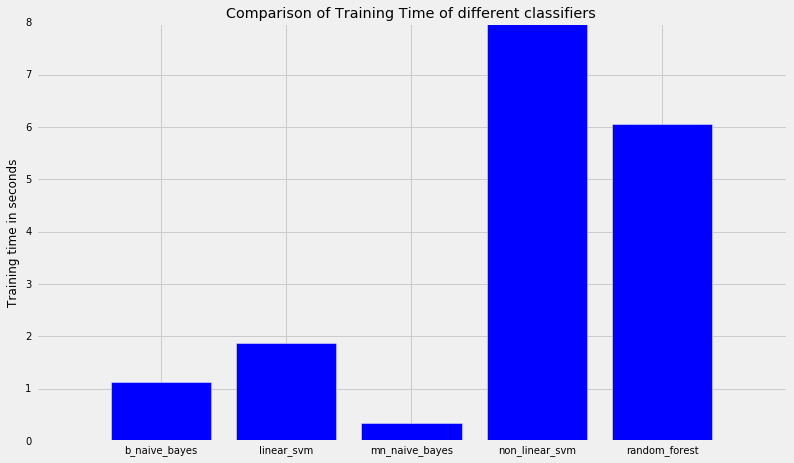

In [304]:
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(12,7))
    plt.bar(range(5),training_time_container.values(),tick_label=training_time_container.keys(),align='center')
    plt.ylabel("Training time in seconds")
    plt.ylim(0,8)
    plt.grid(True)
    plt.title("Comparison of Training Time of different classifiers")

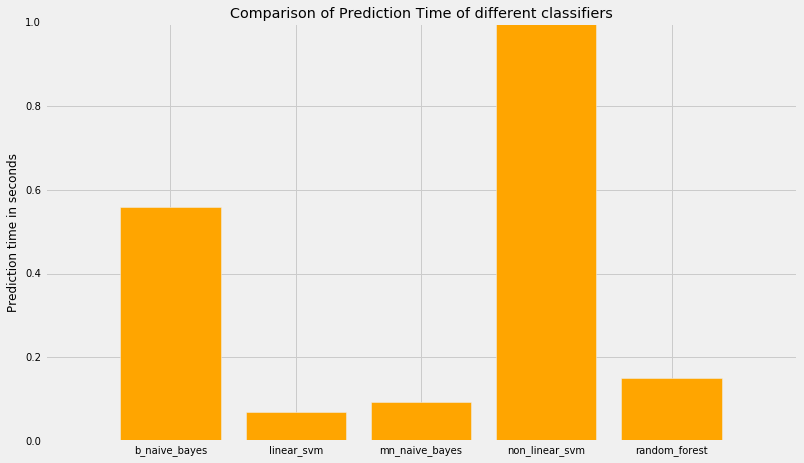

In [300]:
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(12,7))
    plt.bar(range(5),prediction_time_container.values(),tick_label=prediction_time_container.keys(),align='center',color='orange')
    
    plt.ylabel("Prediction time in seconds")
    plt.grid(True)
    plt.ylim(0,1)
    plt.title("Comparison of Prediction Time of different classifiers")

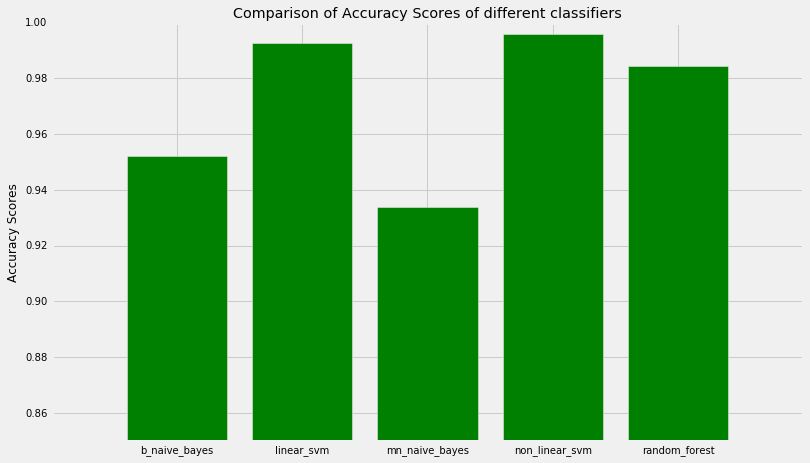

In [296]:
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(12,7))
    plt.bar(range(5),accuracy_container.values(),tick_label=accuracy_container.keys(),align='center',color='g')
    
    plt.ylabel("Accuracy Scores")
    plt.grid(True)
    plt.title("Comparison of Accuracy Scores of different classifiers")
    plt.ylim(0.85,1.0)

## Applying Chi-Square Feature Selection
The analysis that we have conducted so far makes use of 13k+ features that were derived from the TFIDF matrix. However, if we try to apply chi-square stat test for feature selection and select much lesser features out of the current ones,e.g. 5000 only, then we see that the accuracy scores aren't affected to a greater extent. 
chi-square test acutally determines dependence between independent variables. Thus using this function, those features are eliminated that are the most likely to be independent of class and therefore insignificant for classification. In terms of performance, its an added advantage because with lesser features, the overall performance of classifier tend to improve:


In [205]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X_new = SelectKBest(chi2, k=5000).fit_transform(variables,labels)

In [206]:
#splititng the data into training and test data-set again:
cvariables_train, cvariables_test, clabels_train, clabels_test  =   train_test_split(X_new, labels, test_size=.3)

In [207]:
#now use these features to train the linear SVM Classifier and see what results do you get:
svm_classifier2=linear_model.SGDClassifier(alpha=0.0001,penalty='elasticnet',n_iter=50)
svm_classifier_f2=svm_classifier2.fit(cvariables_train, clabels_train)
predictions_svm2=svm_classifier_f2.predict(cvariables_test)

sklearn.metrics.confusion_matrix(clabels_test,predictions_svm2)

array([[569,   0,   1],
       [  0, 305,   1],
       [  3,   0, 331]])

In [208]:
#and if we analyze the accuracy score, we can clearly see that its marginally better than the previous accuracy score that we got
#with Linear SVM trained on training data with 13k+  features. So its a remarkable improvement that using less than half features
#we are able to achieve equivalently good accuracy score.
sklearn.metrics.accuracy_score(clabels_test,predictions_svm2)

0.99586776859504134

## Applying Cross Validation:
cross validation is a model evaluation technique in which input training data is split into k sets/folds and model is learnt on k-1 sets and validated on the remaining set. It minimizes the risk of over-fitting and its main goal is to estimate how accurately a predictive model will perform in practice on un-seen data.


In [210]:
from sklearn import cross_validation

In [211]:
mn_bayes=MultinomialNB()
cv_scores = cross_validation.cross_val_score(mn_bayes, variables_train, labels_train, cv=5)

"t0=time()\nmn_bayes_fit=mn_bayes.fit(variables_train,labels_train)\ntraining_time_container['mn_naive_bayes']=time()-t0\nt0=time()\nprediction_mn=mn_bayes_fit.predict(variables_test)\nprediction_time_container['mn_naive_bayes']=time()-t0\nmn_ascore=sklearn.metrics.accuracy_score(labels_test, prediction_mn) "

In [214]:
print("Accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))
#so the results that we've obtained with cross validation techniques are also almost equivalent to the ones we obtained when
#we trained the Multinomial naive bayes classifier before. This further validates our results and accuracy scores that we've 
#got in the analysis.
#F1-score can also be calculated as follows:
cv_scores_f1=cross_validation.cross_val_score(mn_bayes,variables_train,labels_train,cv=5,scoring='f1_weighted')

Accuracy: 0.92 (+/- 0.03)


In [217]:
print("F1-Scores of Naive Bayes Classifier on Cross Validation Data: %f"%cv_scores_f1.mean())
#which is also approximately equal to the accuracy score that we obtained.

F1-Scores of Naive Bayes Classifier on Cross Validation Data: 0.923256


In [213]:
accuracy_container['mn_naive_bayes']

0.93388429752066116

## Conclusion:
So it can be gathered clearly from the metrics that LinearSVM is clearly the winner in terms of strong accuracy score, training time and testing time. Random Forest and Non linear SVM classifiers' accuracy score is also quite appealing but the high magnitude of their training time is somewhat degrading.
It has also been found and demonstrated that if we use lesser number of features (e.g. 5000), selected by applying chi-square test, then the accuracy scores remains the same. If we further analyze the training and prediction time of the machine learning algorithms, we will come to further know that it would be greatly improved as well because of much less number of features.
The results have been again validated by making use of cross validation. We saw that the accuracy scores that we got were equal to the ones we got by applying cross validation.


## Recommendations:
Here are some recommendations that can be explored to further improve the analysis:
1. I havent used sklearn's pipeline function which gives a lot of order of the steps involved in training, predicting the classifier.
2. Using Functional programming, we can form a general function which can be used to pass classifiers and to derive the results. I have attached a separate notebook which contains such code that I wrote.
3. The current version of the code can be made much more better by making it more modular and defining classes. If required, I can expedite on that as well.
4. I've made use of the state of the art text classification algorithms after going through series of research papers. We can also use Neural networks (MLPs) as well and if needed, it can be implemented.
5. Using latent factorization methods like Non-negative matrix factorization, we can find higher level features that can then be used during classification. I have done one such analysis by applying sparse coding on a transactional database to find out basis vectors/dictionary which improved classification results. The same can be done here as well.
6. We can further augment the feature extraction process by assigning different weights to the text in different positions e.g. assigning more weight to the text in title and the text at the starting sections of the body. This could be used to explore if it improves the results or not.
7. We can also explore forming ngram features to see if those generate any better results or not. 
8. Similarly, we can use advanced methodology like word2vec to find out words that occur together and can use them in the features extraction process as well. 
9. We can experiment with other feature selection methods like Mutual Information gain to see which one gives better results.
10. Another method to validate the results of classifiers can be Area under the curve (AUC) of ROC curve. Using One-Vs-All classification, we can form AUC to further assess the performance of our classifiers.